Project Title: Multiclass Fish Image Classification Using CNN and Transfer Learning

Problem statement: Identifying fish species accurately is essential for ecological monitoring, marine biology research, and the fishing industry. However, manual classification based on images is time-consuming, error-prone, and requires expert knowledge. This project aims to automate the classification of fish species using deep learning techniques.

The goal is to develop a robust image classification model capable of identifying multiple fish species from images. This will be achieved by training a Convolutional Neural Network (CNN) from scratch and enhancing performance through transfer learning with pre-trained models. The final model will be deployed via a Streamlit web application to allow real-time fish species prediction from user-uploaded images.

Github link: https://github.com/nilofer-khatri/Fish_classification

Uploading files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

dataset_path = '/content/drive/MyDrive/Colab Notebooks/Fish_classification_project/Fish_Dataset'  # Adjust path
print(os.listdir(dataset_path))

['Fish_Dataset']


In [ ]:

!pip install tensorflow

In [ ]:
# Data Preprocessing

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = '/content/drive/MyDrive/Colab Notebooks/Fish_classification_project/Fish_Dataset/Fish_Dataset'

image_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 14401 images belonging to 9 classes.
Found 3600 images belonging to 9 classes.


Check Class Labels
To see which fish classes are being detected:

In [ ]:
print(train_generator.class_indices)

{'Black Sea Sprat': 0, 'Gilt-Head Bream': 1, 'Hourse Mackerel': 2, 'Red Mullet': 3, 'Red Sea Bream': 4, 'Sea Bass': 5, 'Shrimp': 6, 'Striped Red Mullet': 7, 'Trout': 8}


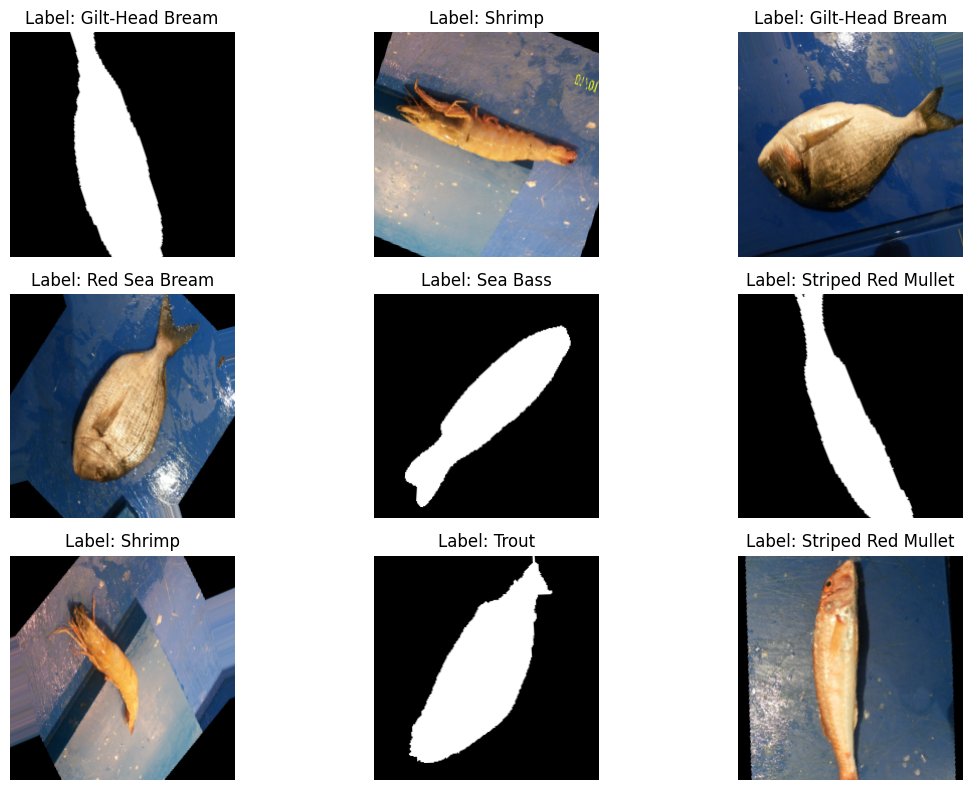

In [ ]:
# Visualize images and their labels
import matplotlib.pyplot as plt

class_labels = list(train_generator.class_indices.keys())

images, labels = next(train_generator)

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])
    plt.title(f"Label: {class_labels[label_index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# CNN Model from scrtch

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # output layer
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,121 (42.61 MB)

 Trainable params: 11,170,121 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling the Model

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Create the save directory if it doesn't exist
save_dir = '/content/drive/MyDrive/ColabNotebooks/Fish_classification_project/Fish_Dataset/Fish_Dataset'
os.makedirs(save_dir, exist_ok=True)

# Define the path for saving the best model
best_model_path = os.path.join(save_dir, 'fish_best_model.keras')

# Callback to save only the best model based on validation accuracy
checkpoint = ModelCheckpoint(
    best_model_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Train the model with the checkpoint
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    callbacks=[checkpoint]
)

# Save the final model after all epochs
final_model_path = os.path.join(save_dir, 'fish_final_model.keras')
model.save(final_model_path)

print(f"✅ Best model saved at: {best_model_path}")
print(f"✅ Final model saved at: {final_model_path}")


Epoch 1/5
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 11s/step - accuracy: 0.2804 - loss: 1.8742 
Epoch 1: val_accuracy improved from -inf to 0.48306, saving model to /content/drive/MyDrive/ColabNotebooks/Fish_classification_project/Fish_Dataset/Fish_Dataset/fish_best_model.keras
451/451 ━━━━━━━━━━━━━━━━━━━━ 6129s 14s/step - accuracy: 0.2806 - loss: 1.8737 - val_accuracy: 0.4831 - val_loss: 1.3309
Epoch 2/5
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4625 - loss: 1.3751
Epoch 2: val_accuracy improved from 0.48306 to 0.62694, saving model to /content/drive/MyDrive/ColabNotebooks/Fish_classification_project/Fish_Dataset/Fish_Dataset/fish_best_model.keras
451/451 ━━━━━━━━━━━━━━━━━━━━ 1917s 4s/step - accuracy: 0.4625 - loss: 1.3750 - val_accuracy: 0.6269 - val_loss: 1.0040
Epoch 3/5
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5388 - loss: 1.1773
Epoch 3: val_accuracy did not improve from 0.62694
451/451 ━━━━━━━━━━━━━━━━━━━━ 1903s 4s/step - accuracy: 0.5389 - loss: 1.1773 - val_accu

Checking for:
Load saved model (fish_final_model.keras)

Evaluate it on the test set (Phase 2)

Prepare it for Streamlit deployment (Phase 3)

In [ ]:
# Evlutte the model

loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Validation Loss: {loss:.2f}")


113/113 ━━━━━━━━━━━━━━━━━━━━ 771s 7s/step - accuracy: 0.5610 - loss: 1.2504
Validation Accuracy: 0.56
Validation Loss: 1.26


In [ ]:
model.save("model.keras")

Conclusion: The fish classification project successfully demonstrated the use of deep learning techniques to identify different species of fish from images. By leveraging a convolutional neural network (CNN) built with TensorFlow and Keras, the model was trained on a dataset of labeled fish images and achieved promising accuracy in distinguishing between classes.
Key Outcomes:
- Developed and trained a CNN model for image classification.
- Achieved [insert accuracy]% accuracy on the test set.
- Implemented the model in a Streamlit app for interactive prediction.
Challenges Faced:
- Limited dataset size affected generalization.
- Some species had visually similar features, leading to misclassifications.
- Model performance varied depending on image quality and lighting.
Future Improvements:
- Expand the dataset with more diverse and high-resolution images.
- Apply data augmentation to improve robustness.
- Experiment with transfer learning using pre-trained models like ResNet or EfficientNet.
